In [1]:
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'

In [3]:
filename = 'Datos/EstrellaEspectro.txt'

In [4]:
urllib.request.urlretrieve(url, filename)

('Datos/EstrellaEspectro.txt', <http.client.HTTPMessage at 0x29ff86e3940>)

In [5]:
datos = pd.read_csv(filename, sep="  ", header=None, names=["x", "y"])

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2544\3479761762.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos = pd.read_csv(filename, sep="  ", header=None, names=["x", "y"])


In [6]:
max = [False]*198

In [7]:
for indice, fila in datos.iterrows():
    if indice == 0:
        if datos.at[indice+1, "y"] < fila["y"]:
            max[indice] = True
    if indice == len(datos)-1:
        if datos.at[indice-1, "y"] < fila["y"]:
            max[indice] = True
    else:
        if datos.at[indice+1, "y"] < fila["y"] and datos.at[indice-1, "y"] < fila["y"]:
            max[indice] = True
            
datos["max"] = max

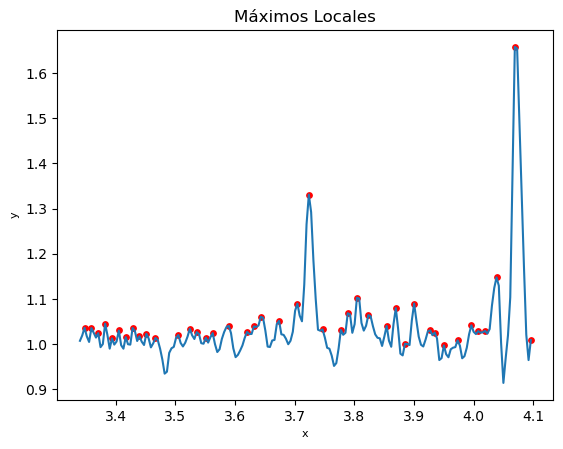

In [8]:
for i in range(len(datos)):
    if datos.at[i,"max"]:
        plt.scatter(datos.at[i,"x"], datos.at[i,"y"], c = "red", s= 15)

plt.plot(datos["x"], datos["y"])
plt.title('Máximos Locales', fontsize=12)
plt.xlabel('x', fontsize=8)
plt.ylabel('y', fontsize=8)
plt.show()